In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Dataset/Customer Churn.csv')
#Rename columns
renamed_columns = {'Call  Failure': 'call_failure', 'Complains':'complains', 'Subscription  Length': 'subscription_length', 'Charge  Amount': 'charge_amount',
       'Seconds of Use': 'seconds_of_use', 'Frequency of use': 'frequency_of_use', 'Frequency of SMS': 'frequency_of_sms',
       'Distinct Called Numbers': 'distinct_called_numbers', 'Age Group': 'age_group', 'Tariff Plan': 'tariff_plan', 'Status': 'status', 'Age': 'age',
       'Customer Value': 'customer_value', 'Churn': 'churn'}
df.rename(columns=renamed_columns, inplace=True)
df.columns

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_failure             3150 non-null   int64  
 1   complains                3150 non-null   int64  
 2   subscription_length      3150 non-null   int64  
 3   charge_amount            3150 non-null   int64  
 4   seconds_of_use           3150 non-null   int64  
 5   frequency_of_use         3150 non-null   int64  
 6   frequency_of_sms         3150 non-null   int64  
 7   distinct_called_numbers  3150 non-null   int64  
 8   age_group                3150 non-null   int64  
 9   tariff_plan              3150 non-null   int64  
 10  status                   3150 non-null   int64  
 11  age                      3150 non-null   int64  
 12  customer_value           3150 non-null   float64
 13  churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [4]:
# Statistical Summary
print("\nStatistical Summary:")
df.describe(include='all')


Statistical Summary:


,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


From the summary statistics, we can observe the following insights:

1. Call Failures:
    - The average number of call failures per customer is 7.63, with a standard deviation of 7.26, indicating moderate variability.
    - The range is wide (0–36), with a median of 6 and 75% of customers having 12 or fewer failures.
    - A large portion of customers experience relatively low call failures, suggesting potential issues only for a minority.
2. Complaints:
    - Complaints are infrequent, with a mean of 0.077 (about 8% of customers have complaints).
    - The maximum is 1 (likely indicating a binary variable), and 75% of customers have zero complaints. This suggests customer satisfaction is relatively high, but outliers may require attention.
3. Subscription Length:
    - The average subscription length is 32.54 months, with a standard deviation of 8.57 months.
    - The range is 3–47 months, and the median is 35 months. 
    - This indicates that most customers have been with the service for a significant period, reflecting loyalty.
4. Charge Amount:
    - The mean charge amount is low (0.94), and 50% of customers have zero charges, likely due to non-use or prepaid plans.
    - The maximum value is 10, showing some customers incur higher charges.
5. Seconds of Use:
    - Customers use an average of 4,472 seconds (~75 minutes) with high variability (std: 4,197 seconds).
    - 25% of customers use 1,391 seconds (~23 minutes) or less, while heavy users reach up to 17,090 seconds (~4.7 hours).
    - Significant disparities in usage suggest diverse customer behaviors.
6. Frequency of Use and SMS:
    - Call frequency averages 69.46, while SMS usage averages 73.17, with large variability in both.
    - Heavy SMS users (75th percentile at 87) far outpace low users (25th percentile at 6), indicating distinct user preferences for messaging.
7. Distinct Called Numbers:
    - Customers call an average of 23.51 distinct numbers, with a maximum of 97.
    - 75% of customers contact 34 or fewer numbers, suggesting most users have a limited circle of contacts.
8. Age Group and Age:
    - The average age group is 2.83 (possibly indicating an age range, e.g., 2 = 20–30 years), and most customers fall into groups 2 or 3.
    - The actual average age is ~31, with a range of 15–55 years. This shows the customer base skews young to middle-aged.
9. Tariff Plan:
    - The mean tariff plan is 1.08, with most customers likely on plan 1 (assuming 1 and 2 are distinct tariff categories). Plan 2 adoption seems limited.
10. Customer Value:
    - The average customer value is 470.97, with high variability (std: 517.02) and a maximum of 2,165.
    - A significant portion of customers (25th percentile: 113.80) generates low revenue, while others are high-value.
11. Churn:
    - Churn is low, with only 15.7% of customers leaving (mean: 0.157).
    - Most customers (84.3%) remain loyal, suggesting strong retention but potential risk in addressing the 15.7% churners.

Findings:\
Clear segments exist: high-usage vs. low-usage customers, SMS-focused users, and varied revenue-generating customers. Targeted marketing and personalized plans can cater to these distinct groups. High variability in seconds of use and customer value indicates scope for optimizing pricing strategies. Low churn is a positive indicator but requires attention to the minority of customers showing dissatisfaction. A significant proportion of customers contribute minimal revenue, suggesting potential for upselling or cost-cutting on low-revenue accounts. 

### Histograms

array([[<Axes: title={'center': 'call_failure'}>,
        <Axes: title={'center': 'complains'}>,
        <Axes: title={'center': 'subscription_length'}>,
        <Axes: title={'center': 'charge_amount'}>],
       [<Axes: title={'center': 'seconds_of_use'}>,
        <Axes: title={'center': 'frequency_of_use'}>,
        <Axes: title={'center': 'frequency_of_sms'}>,
        <Axes: title={'center': 'distinct_called_numbers'}>],
       [<Axes: title={'center': 'age_group'}>,
        <Axes: title={'center': 'tariff_plan'}>,
        <Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'customer_value'}>,
        <Axes: title={'center': 'churn'}>, <Axes: >, <Axes: >]],
      dtype=object)

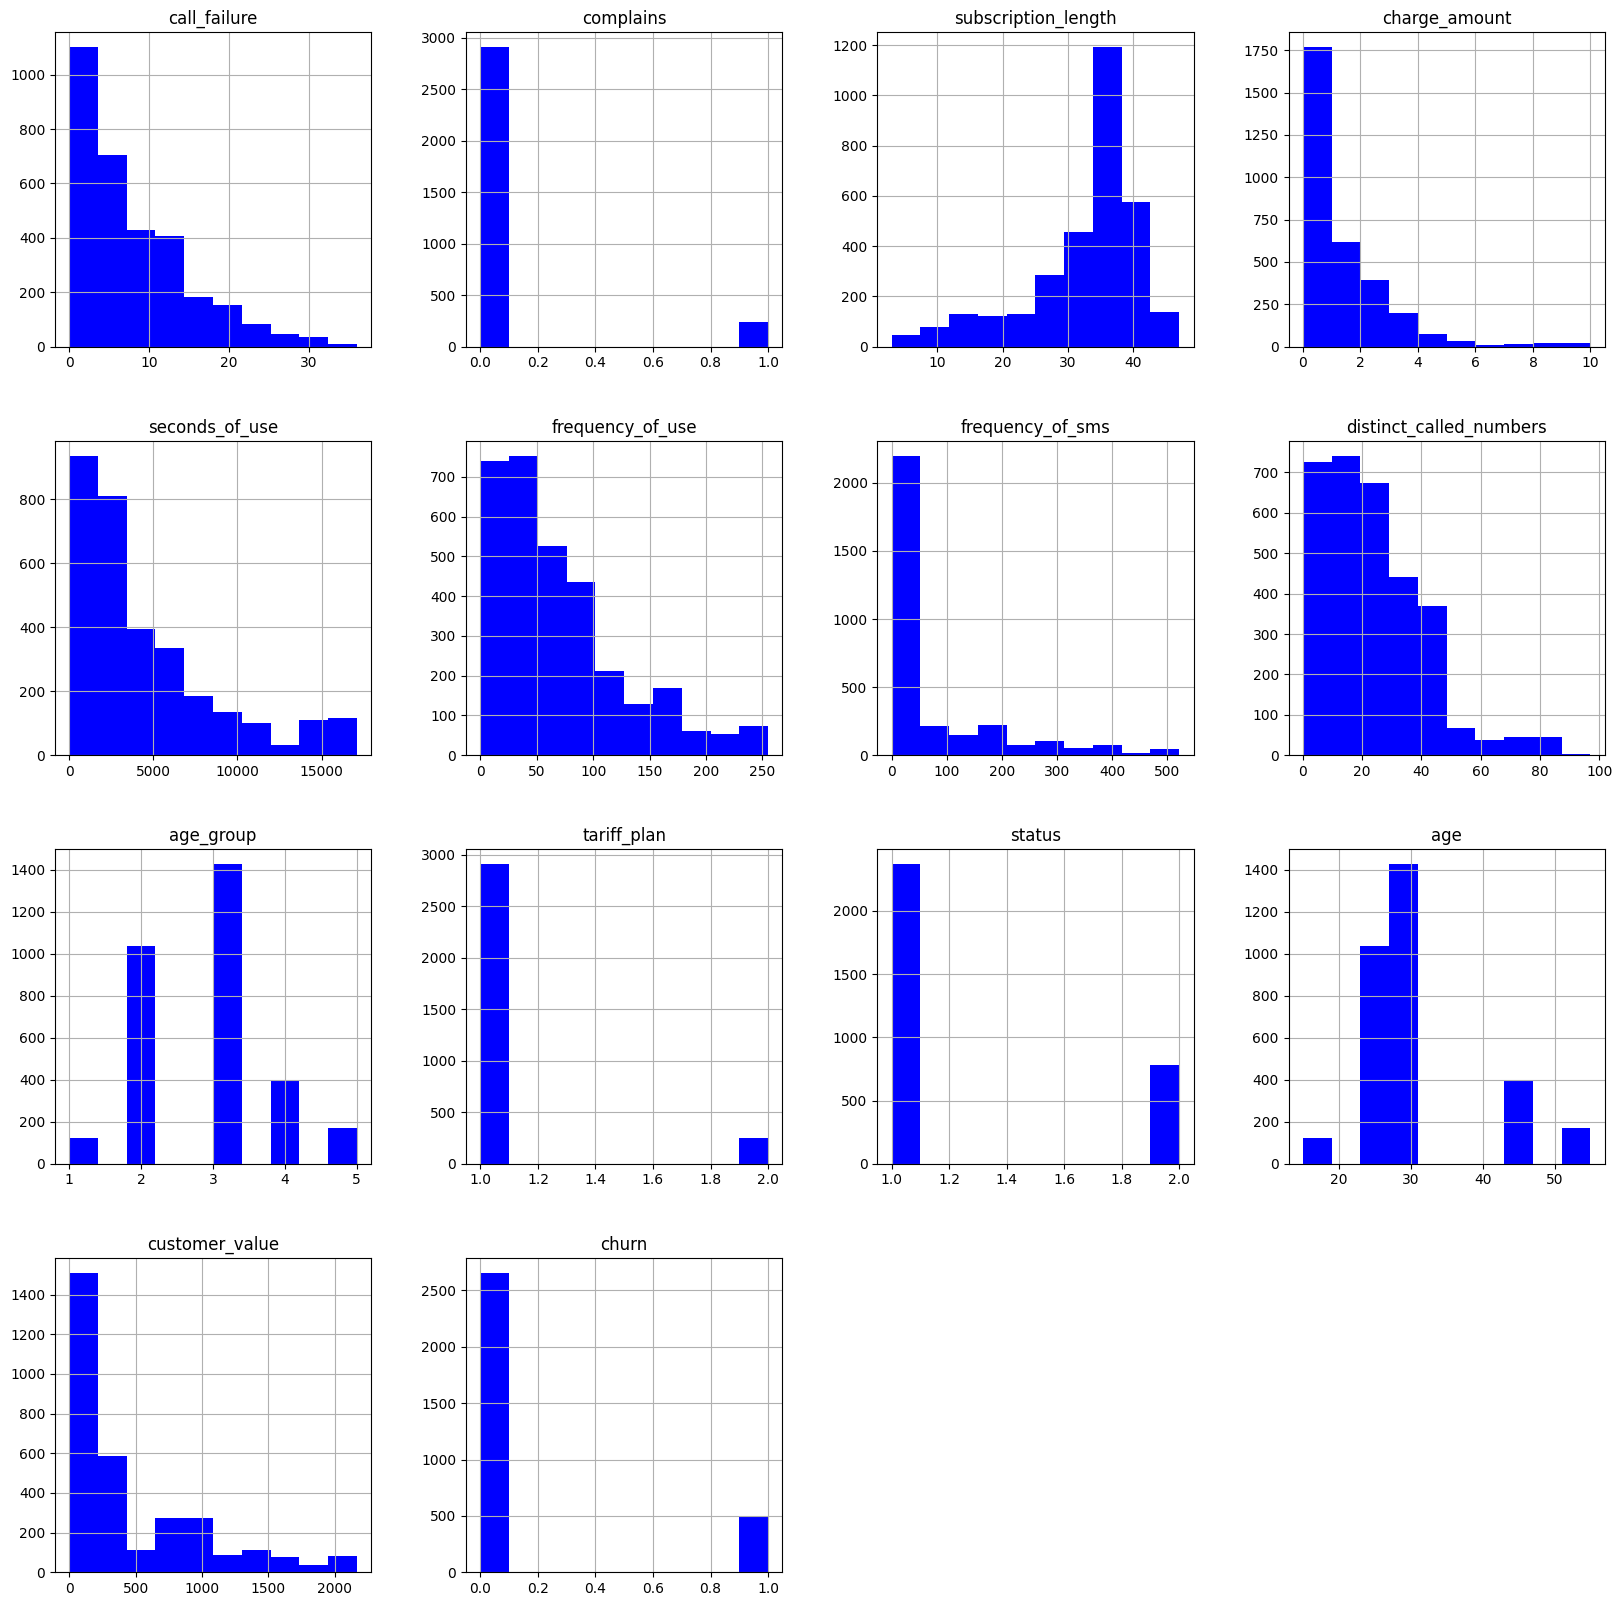

In [ ]:
figure, axes = plt.subplots(figsize=(20, 20))
df.hist(ax=axes,color='blue', column=)

From the histograms, we can observe the following insights:

1. Call Failures:
    - The distribution is right-skewed, with most customers experiencing fewer failures.
    - The peak is around 0–5 failures, with a long tail of higher failure counts.

2. Complaints:
    - The distribution is heavily right-skewed, with most customers having zero complaints.
    - A small portion of customers have complaints.

3. Subscription Length:
    - The distribution is slightly left-skewed, with a peak around 35 months.
    - A small number of customers have shorter subscriptions, while a larger portion has longer subscriptions.

4. Charge Amount:
    - The distribution is heavily right-skewed, with most customers having very small charges.

5. Seconds of Use:
    - The distribution is right-skewed, with most customers using fewer seconds.
    - A small number of customers are heavy users, with a peak around 15,000 seconds.

6. Frequency of Use and SMS:
    - Both distributions are right-skewed, with most customers having lower usage.
    - A small number of customers are heavy users, with peaks around 0–100 for both call frequency and SMS usage.

7. Distinct Called Numbers:
    - The distribution is right-skewed, with most customers contacting fewer numbers.
    - A small number of customers contact many numbers, with a peak around 0–50 numbers.

9. Tariff Plan:
    - The distribution is slightly right-skewed, with most customers on tariff plan 1.
    - Fewer customers are on tariff plan 2, with a peak around plan 1.

10. Customer Value:

    - The distribution is heavily right-skewed, with most customers generating lower revenue.
    - A small number of customers are high-value, with a peak around 0–500.

11. Churn:
    - The distribution is right-skewed, with most customers not churning.
    - A small number of customers churn, with a peak around zero churn.

### Correlation

In [6]:
#Convert Qualititative attributes to Quantititaive
df['churn'] = df['churn'].astype('category').cat.codes
df['status'] = df['status'].astype('category').cat.codes
df['tariff_plan'] = df['tariff_plan'].astype('category').cat.codes
df['complains'] = df['complains'].astype('category').cat.codes
df['charge_amount'] = df['charge_amount'].astype('category').cat.codes
df['age_group'] = df['age_group'].astype('category').cat.codes

In [7]:
df.corr()

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn
call_failure,1.000000,0.152879,0.169737,0.589028,0.501607,0.573349,-0.022282,0.504058,0.050406,0.192285,-0.114645,0.041758,0.121225,-0.008987
complains,0.152879,1.000000,-0.020286,-0.033948,-0.104952,-0.090774,-0.111633,-0.058199,0.019976,0.001140,0.271405,0.003298,-0.132895,0.532053
subscription_length,0.169737,-0.020286,1.000000,0.078789,0.124618,0.106534,0.076318,0.092009,0.021453,-0.159680,0.142841,-0.002430,0.109565,-0.032588
charge_amount,0.589028,-0.033948,0.078789,1.000000,0.446738,0.379096,0.091533,0.415198,0.279679,0.324232,-0.356269,0.278955,0.169428,-0.202305
seconds_of_use,0.501607,-0.104952,0.124618,0.446738,1.000000,0.946489,0.102123,0.676536,0.020060,0.133593,-0.460618,0.020843,0.415087,-0.298935
frequency_of_use,0.573349,-0.090774,0.106534,0.379096,0.946489,1.000000,0.100019,0.736114,-0.032544,0.206452,-0.454752,-0.028350,0.401572,-0.303337
frequency_of_sms,-0.022282,-0.111633,0.076318,0.091533,0.102123,0.100019,1.000000,0.079650,-0.053719,0.195686,-0.296164,-0.092798,0.924877,-0.220754
distinct_called_numbers,0.504058,-0.058199,0.092009,0.415198,0.676536,0.736114,0.079650,1.000000,0.020941,0.172079,-0.413039,0.051037,0.284807,-0.278867
age_group,0.050406,0.019976,0.021453,0.279679,0.020060,-0.032544,-0.053719,0.020941,1.000000,-0.150593,0.002506,0.960758,-0.183481,-0.014550
tariff_plan,0.192285,0.001140,-0.159680,0.324232,0.133593,0.206452,0.195686,0.172079,-0.150593,1.000000,-0.164143,-0.119426,0.252298,-0.105853


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'call_failure'),
  Text(1.5, 0, 'complains'),
  Text(2.5, 0, 'subscription_length'),
  Text(3.5, 0, 'charge_amount'),
  Text(4.5, 0, 'seconds_of_use'),
  Text(5.5, 0, 'frequency_of_use'),
  Text(6.5, 0, 'frequency_of_sms'),
  Text(7.5, 0, 'distinct_called_numbers'),
  Text(8.5, 0, 'age_group'),
  Text(9.5, 0, 'tariff_plan'),
  Text(10.5, 0, 'status'),
  Text(11.5, 0, 'age'),
  Text(12.5, 0, 'customer_value'),
  Text(13.5, 0, 'churn')])

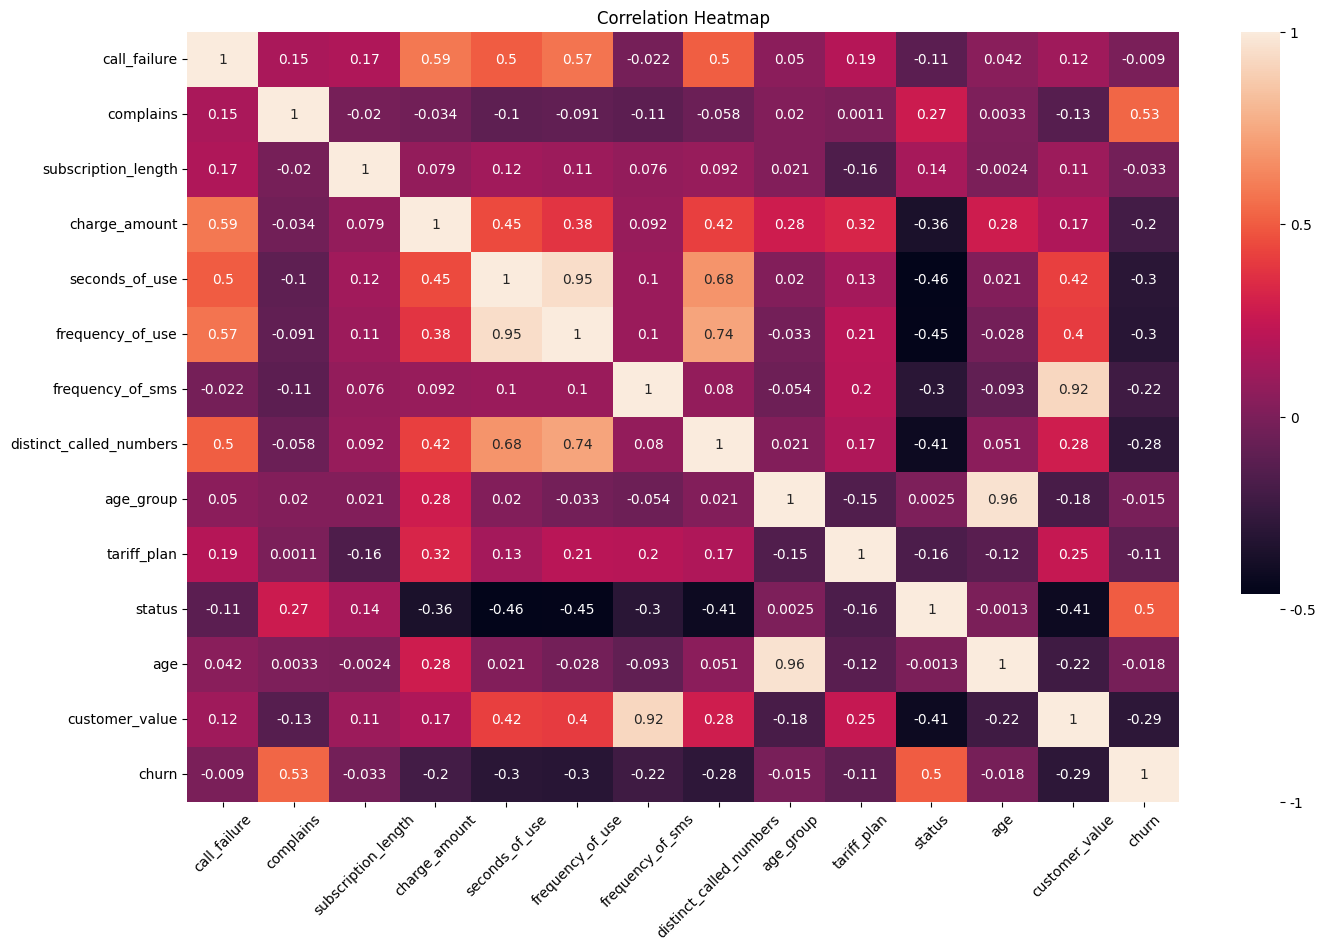

In [12]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(df.corr(), annot=True, linecolor='grey')
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.set_ticklabels(['-1', '-0.5', '0', '0.5', '1'])
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)

### Analysis from the Correlation Matrix:

-  `customer_value` and `frequency_of_sms`: The correlation coefficient is 0.92. `customer_value` is a derived metric that quantifies the value or profitability associated with each customer. This means that the value is unlikely to be independent of the other features in the dataset. Given the high correlation between `customer_value` and `frequency_of_sms`, and considering that `customer_value` is a calculated metric, it is prudent to remove `customer_value` from the analysis for machine learning. This decision aims to maintain the integrity and reliability of the models.

- `seconds_of_use` and `frequency_of_use`: The correlation coefficient is 0.95. `seconds_of_use` represents the total number of seconds a customer uses the service, while `frequency_of_use` represents the number of times a customer uses the service. The high correlation between these two variables indicates that they are closely related and provide similar information. To avoid redundancy in the analysis, we can choose to keep only one of these variables. Given that `seconds_of_use` provides more detailed information about customer behavior, we retain `seconds_of_use` and remove `frequency_of_use` for machine learning.

- `age_group` and `age`: The correlation coefficient is 0.96. `age_group` is a categorical variable that likely represents age ranges. The high correlation between `age_group` and `age` suggests that these variables are closely related. In this case, it is advisable to retain only one of the variables in the analysis to avoid multicollinearity. Since `age` is a more granular representation of age, we keep `age` and remove `age_group` for machine learning.

These changes are implemented in `ML.ipynb`.

### Hypothesis Testing

#### 1. Hypothesis: Call Failures Increase Complaints
- Null Hypothesis ($H_0$): There is no relationship between the number of call failures and complaints.
- Alternative Hypothesis ($H_1$): Customers with more call failures are more likely to complain.
- Significance Level: 0.05
- Test: Two-sample t-test

In [ ]:
call_failures_complaint = df[df['complains'] == 1]['call_failure']
call_failures_no_complaint = df[df['complains'] == 0]['call_failure']

# Perform t-test
t_stat, p_value = ttest_ind(call_failures_complaint, call_failures_no_complaint, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 6.843811388811775, P-value: 5.405492348335111e-11


The p-value is much smaller than the significance level. Therefore, we reject the null hypothesis ($H_0$). There is strong statistical evidence to suggest a significant relationship between call failures and customer complaints. Customers with more call failures are significantly more likely to file complaints. The extremely low p-value indicates that the difference in call failures between complainants and non-complainants is highly unlikely to have occurred by chance.  

#### 2. Hypothesis: Higher Subscription Length Reduces Churn
- Null Hypothesis ($H_0$): Subscription length does not differ significantly between churned and non-churned customers.
- Alternative Hypothesis ($H_1$): Non-churned customers have a higher subscription length than churned customers.
- Significance Level: 0.05
- Test: Two-sample t-test

In [10]:
subscription_churned = df[df['churn'] == 1]['subscription_length']
subscription_not_churned = df[df['churn'] == 0]['subscription_length']

# Perform t-test
t_stat, p_value = ttest_ind(subscription_churned, subscription_not_churned, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.684356306257181, P-value: 0.09259534404582562


The p-value is slightly larger than the significance level (0.05). Therefore, we fail to reject the null hypothesis ($H_0$). This means we don't have strong statistical evidence to conclude that subscription length significantly differs between churned and non-churned customers.

#### 3. Hypothesis: Tariff Plan Influences Churn
- Null Hypothesis ($H_0$): Tariff plan has no association with churn.
- Alternative Hypothesis ($H_1$): Tariff plan is associated with churn.
- Significance Level: 0.05
- Test: Chi-square test

In [11]:
# Create contingency table
contingency_table = pd.crosstab(df['tariff_plan'], df['churn'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, P-value: {p}")

Chi-square statistic: 34.21761003954184, P-value: 4.928097701198338e-09


The p-value is much smaller than the significance level. Therefore, we reject the null hypothesis ($H_0$). There is extremely strong statistical evidence of an association between tariff plan and customer churn. The probability of observing such a relationship by chance is virtually zero. Tariff plan appears to have a significant influence on whether a customer churns or not.  

#### 4. Hypothesis: High Frequency of Use Leads to Higher Customer Value
- Null Hypothesis ($H_0$): Customers with high frequency of use have the same or lower customer value as others.
- Alternative Hypothesis ($H_1$): Customers with high frequency of use have higher customer value.
- Significance Level: 0.05
- Test: one tailed t-test

In [13]:
threshold = df['frequency_of_use'].quantile(0.75)

# Split data
high_freq_users = df[df['frequency_of_use'] > threshold]['customer_value']
low_freq_users = df[df['frequency_of_use'] <= threshold]['customer_value']

# Perform one-tailed t-test
t_stat, p_value = ttest_ind(high_freq_users, low_freq_users, alternative='greater')  # One-tailed test
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 23.77654034530582, P-value: 2.2897505296431706e-115


The p-value is dramatically smaller than the significance level. Therefore, we reject the null hypothesis ($H_0$). There is overwhelming statistical evidence that high-frequency users have significantly higher customer value. The probability of this result occurring by chance is essentially zero. The extremely large t-statistic indicates a substantial difference in customer value between high and low-frequency users.

#### 5. Hypothesis: Younger Customers Use More SMS
- Null Hypothesis ($H_0$): Younger customers (age ≤ 30) send the same or fewer SMS than older customers (age > 30).
- Alternative Hypothesis ($H_1$):  Younger customers send more SMS than older customers.
- Significance Level: 0.05
- Test: one tailed t-test

In [14]:
young_customers = df[df['age'] <= 30]['frequency_of_sms']
older_customers = df[df['age'] > 30]['frequency_of_sms']

# Perform one-tailed t-test
t_stat, p_value = ttest_ind(young_customers, older_customers, alternative='greater')  # One-tailed test
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 8.336047949411718, P-value: 5.665765780739817e-17


The p-value is much smaller than the significance level. Therefore, we reject the null hypothesis ($H_0$). There is extremely strong statistical evidence that younger customers send more SMS. The probability of this result occurring by chance is virtually zero. The large positive t-statistic confirms that younger customers have a significantly higher frequency of SMS usage.